# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
# Load the data
raw_data = pd.read_csv('Categorical.csv')
# Check the data
pd.set_option('display.max_rows', None)
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
5,Aland,19.953288,60.214887,Europe
6,Andorra,1.560544,42.542291,Europe
7,United Arab Emirates,54.300167,23.905282,Asia
8,Argentina,-65.179807,-35.381349,South America
9,Armenia,44.929933,40.289526,Asia


### Remove the duplicate index column from the dataset. 

In [3]:
raw_data
data = raw_data.copy()
#data = data.drop(['Unnamed: 0'], axis = 1)
#Counting how many continents have on data
data['continent'].nunique()

8

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped.head(10)

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
5,Aland,19.953288,60.214887,1
6,Andorra,1.560544,42.542291,1
7,United Arab Emirates,54.300167,23.905282,2
8,Argentina,-65.179807,-35.381349,4
9,Armenia,44.929933,40.289526,2


In [5]:
data_mapped.describe()

,Longitude,Latitude,continent
count,241.000000,241.000000,241.000000
mean,14.215380,17.169377,2.261411
std,72.013654,26.554014,1.658980
min,-177.348348,-80.508579,0.000000
25%,-36.433184,1.358761,1.000000
50%,18.644925,17.277500,2.000000
75%,47.587005,39.115541,3.000000
max,171.484924,74.710513,7.000000


## Select the features

In [6]:
x = data_mapped.iloc[:,3:4]
x

,continent
0,0
1,2
2,3
3,0
4,1
5,1
6,1
7,2
8,4
9,2


## Clustering

Use 4 clusters initially.

In [7]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 2, 3, 0, 5, 5, 5, 2, 1, 2, 4, 7, 4, 6, 0, 4, 5, 2, 3, 5, 3, 3,
       2, 5, 2, 0, 0, 5, 0, 5, 0, 0, 1, 1, 0, 2, 2, 3, 3, 5, 1, 2, 3, 3,
       3, 3, 4, 1, 3, 3, 0, 0, 0, 0, 2, 2, 5, 5, 3, 0, 5, 0, 3, 1, 3, 3,
       5, 5, 3, 5, 4, 1, 5, 5, 4, 3, 5, 2, 5, 3, 3, 3, 3, 3, 5, 0, 0, 0,
       4, 1, 2, 6, 0, 5, 0, 5, 2, 5, 2, 2, 6, 5, 2, 2, 5, 2, 5, 0, 5, 2,
       2, 2, 2, 3, 2, 2, 4, 0, 2, 5, 2, 2, 2, 3, 3, 0, 5, 2, 3, 5, 5, 5,
       2, 0, 3, 5, 5, 3, 6, 0, 4, 5, 3, 5, 2, 5, 2, 4, 3, 3, 0, 6, 3, 2,
       3, 4, 3, 4, 3, 0, 4, 5, 5, 2, 4, 4, 2, 2, 0, 4, 1, 2, 4, 4, 5, 0,
       2, 5, 1, 2, 4, 2, 5, 5, 3, 3, 2, 3, 3, 3, 2, 6, 6, 4, 3, 0, 5, 3,
       3, 0, 5, 3, 1, 5, 5, 5, 3, 0, 6, 2, 0, 3, 3, 2, 2, 2, 2, 4, 0, 3,
       2, 2, 3, 3, 5, 1, 0, 2, 5, 0, 1, 0, 0, 2, 4, 4, 4, 2, 3, 3, 3])

In [9]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,2,2
2,Angola,17.537368,-12.293361,3,3
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,1,5
5,Aland,19.953288,60.214887,1,5
6,Andorra,1.560544,42.542291,1,5
7,United Arab Emirates,54.300167,23.905282,2,2
8,Argentina,-65.179807,-35.381349,4,1
9,Armenia,44.929933,40.289526,2,2


## Plot the data

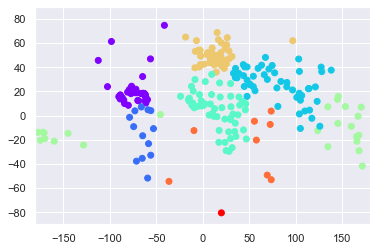

In [10]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.